# Aikeen Industries

Aikeen Industries is a leading manufacturer and seller of gourmet crips & nachos products.

It is looking at its operations wanting to sync all aspects of its business from production to forecasting. 

Aikeen Industries’ priority is to ensure a strong production, selling and forecasting business model to take the company to the phase 1 of their expansion plan.


## Business Questions to solve:

1. Sales team performance by comparing Sales Forecast to Production Forecast.
2. Inefficiencies in forecast by comparing Actual Production to Production Forecast.
6. Accuracy of Forecast = [(Actual Production/Production Forecast) *100]
3. Identify products with high inaccuracies in forecasts based on historical data (2020 till date)
4. How many shortages of orders? (compare Sales Orders vs Finished Goods Inventory?)
5. Calculate Sell-through rate: Sell-through rate = (Units Consumed/Units Produced)
7. Identify items in Finished Goods Inventory for which we have no or low sales (consumed means sold).
8. Fill rate = [(*Total Units in inventory-Consumed Units)/Total Units in inventory] *100
9. Predict the remaining 2022 forecast using Actual Production vs Production Forecast
10. Predict the 2022 sales team performance using Sales Forecast vs Production Forecast

*Total Units in inventory = Opening plus produced minus consumed

### Load Data

In [2]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import waterfall_chart

import seaborn as sns

In [3]:
# Load csv files

df_SO = pd.read_csv('C:/Users/k3ke/Aikeen Industries/Sales Order.csv')
df_Act_Prod = pd.read_csv('C:/Users/k3ke/Aikeen Industries/Actual Production.csv')
df_Fin_Inv = pd.read_csv('C:/Users/k3ke/Aikeen Industries/Finished Good Inventory.csv')
df_Machines = pd.read_csv('C:/Users/k3ke/Aikeen Industries/Machines.csv')
df_ProdSales_FX = pd.read_csv('C:/Users/k3ke/Aikeen Industries/Production & Sales Forecast.csv')
df_Products = pd.read_csv('C:/Users/k3ke/Aikeen Industries/Products.csv')

### Data Preparation

- Finding missing data
- Detecting outliers
- Detecting unnecessary columns
- Detecting errors in finished goods inventory table

In [4]:
df_SO.head()

,Product,Quantity,7-May-22,8-May-22,9-May-22,10-May-22,11-May-22,12-May-22,13-May-22,14-May-22,15-May-22,16-May-22,17-May-22,18-May-22,19-May-22,20-May-22
0,Product 1,141,0,0,0,0,0,0,36,0,0,0,0,0,0,0
1,Product 2,877,0,0,36,90,0,180,216,0,0,36,198,36,0,0
2,Product 3,1593,0,0,25,0,0,100,100,0,0,125,175,0,0,0
3,Product 4,463,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Product 5,2284,0,0,576,300,0,1320,1392,0,0,192,1296,288,0,0


In [23]:
print(df_SO.isna().sum())

Product      0
Quantity     0
7-May-22     0
8-May-22     0
9-May-22     0
10-May-22    0
11-May-22    0
12-May-22    0
13-May-22    0
14-May-22    0
15-May-22    0
16-May-22    0
17-May-22    0
18-May-22    0
19-May-22    0
20-May-22    0
dtype: int64


In [5]:
df_SO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    181 non-null    object
 1   Quantity   181 non-null    int64 
 2   7-May-22   181 non-null    int64 
 3   8-May-22   181 non-null    int64 
 4   9-May-22   181 non-null    int64 
 5   10-May-22  181 non-null    int64 
 6   11-May-22  181 non-null    int64 
 7   12-May-22  181 non-null    int64 
 8   13-May-22  181 non-null    int64 
 9   14-May-22  181 non-null    int64 
 10  15-May-22  181 non-null    int64 
 11  16-May-22  181 non-null    int64 
 12  17-May-22  181 non-null    int64 
 13  18-May-22  181 non-null    int64 
 14  19-May-22  181 non-null    int64 
 15  20-May-22  181 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 22.8+ KB


In [6]:
df_Products.head()

,Product,Product Type
0,Product 1,Cheddar & Sour
1,Product 2,Cheddar & Sour
2,Product 3,Cheddar & Sour
3,Product 4,Cheddar & Sour
4,Product 5,Cheddar & Sour


In [24]:
print(df_Products.isna().sum())

Product         0
Product Type    0
dtype: int64


In [21]:
df_Products.value_counts("Product Type")

Product Type
Tangy Cheese          601
Cheddar & Sour        204
Salt & Vinegar        130
Original              122
Spicy Nacho           115
Lightly Salted        113
Chicken & Waffles     101
BBQ                   100
Cheddar Cheese         92
Chilli Cheese          85
Cheese & jalapeno      73
Sour Cream & Onion     61
dtype: int64

In [7]:
df_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       1797 non-null   object
 1   Product Type  1797 non-null   object
dtypes: object(2)
memory usage: 28.2+ KB


In [8]:
df_ProdSales_FX.head()

,Date,Product,Forecast Type,Forecast Units,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1/1/2020,Product 1,Production Forecast,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2020,Product 1,Sales Forecast,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/2020,Product 1,Production Forecast,1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/1/2020,Product 1,Sales Forecast,1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/1/2020,Product 1,Production Forecast,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(df_ProdSales_FX.isna().sum())

Date                  0
Product               0
Forecast Type         0
Forecast Units        0
Unnamed: 4        14300
Unnamed: 5        14300
Unnamed: 6        14300
Unnamed: 7        14300
Unnamed: 8        14300
Unnamed: 9        14300
Unnamed: 10       14300
Unnamed: 11       14300
Unnamed: 12       14300
Unnamed: 13       14300
Unnamed: 14       14300
dtype: int64


In [9]:
df_ProdSales_FX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            14300 non-null  object 
 1   Product         14300 non-null  object 
 2   Forecast Type   14300 non-null  object 
 3   Forecast Units  14300 non-null  int64  
 4   Unnamed: 4      0 non-null      float64
 5   Unnamed: 5      0 non-null      float64
 6   Unnamed: 6      0 non-null      float64
 7   Unnamed: 7      0 non-null      float64
 8   Unnamed: 8      0 non-null      float64
 9   Unnamed: 9      0 non-null      float64
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     0 non-null      float64
 12  Unnamed: 12     0 non-null      float64
 13  Unnamed: 13     0 non-null      float64
 14  Unnamed: 14     0 non-null      float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.6+ MB


In [10]:
df_Act_Prod.head()

,Date,Machine,Product,Quantity,Shift
0,1/2/2020,F-12,Product 1,132,Shift#2
1,1/16/2020,F-12,Product 1,216,Shift#2
2,1/17/2020,F-12,Product 1,348,Shift#1
3,1/31/2020,F-12,Product 1,72,Shift#2
4,2/2/2020,F-12,Product 1,324,Shift#2


In [20]:
df_Act_Prod.value_counts("Shift")

Shift
Shift#2    7882
Shift#1    7773
dtype: int64

In [11]:
df_Act_Prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15655 entries, 0 to 15654
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      15655 non-null  object
 1   Machine   15655 non-null  object
 2   Product   15655 non-null  object
 3   Quantity  15655 non-null  int64 
 4   Shift     15655 non-null  object
dtypes: int64(1), object(4)
memory usage: 611.6+ KB


In [12]:
# Found the closing value on the first row is not correct

df_Fin_Inv.head()

,Date,Product,Opening,Produced,Consumed,Closing
0,5/24/2022,Product 1,141,0,-12,141
1,5/24/2022,Product 2,949,0,-72,877
2,5/24/2022,Product 3,1486,182,-75,1593
3,5/24/2022,Product 4,463,0,0,463
4,5/24/2022,Product 5,2980,492,-1188,2284


In [13]:
df_Fin_Inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      176 non-null    object
 1   Product   176 non-null    object
 2   Opening   176 non-null    int64 
 3   Produced  176 non-null    int64 
 4   Consumed  176 non-null    int64 
 5   Closing   176 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 8.4+ KB


In [15]:
df_Machines.head()

,Machines,Machine Type
0,F-1,Forming
1,F-2,Forming
2,F-3,Forming
3,F-4,Forming
4,F-5,Forming


In [16]:
df_Machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Machines      21 non-null     object
 1   Machine Type  21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


In [17]:
#Found negative values and unnecessary columns in this particular df

df_ProdSales_FX.head()

,Date,Product,Forecast Type,Forecast Units,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1/1/2020,Product 1,Production Forecast,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2020,Product 1,Sales Forecast,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/2020,Product 1,Production Forecast,1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/1/2020,Product 1,Sales Forecast,1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/1/2020,Product 1,Production Forecast,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_ProdSales_FX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            14300 non-null  object 
 1   Product         14300 non-null  object 
 2   Forecast Type   14300 non-null  object 
 3   Forecast Units  14300 non-null  int64  
 4   Unnamed: 4      0 non-null      float64
 5   Unnamed: 5      0 non-null      float64
 6   Unnamed: 6      0 non-null      float64
 7   Unnamed: 7      0 non-null      float64
 8   Unnamed: 8      0 non-null      float64
 9   Unnamed: 9      0 non-null      float64
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     0 non-null      float64
 12  Unnamed: 12     0 non-null      float64
 13  Unnamed: 13     0 non-null      float64
 14  Unnamed: 14     0 non-null      float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.6+ MB


### Data Cleaning

1. Dropping negative values/transforming outliers.
2. Dropping unnecessary columns from Production and Sales Forecast DataFrame.
3. Drop the "Closing" column in finished goods inventory DataFrame because the value is inaccurate.
4. Re-create new "Closing" column.
5. Drop the "Quantity" column in Sales Order DataFrame because inaccurate value, will be using the "Closing" column in finished goods inventory DataFrame.

In [10]:
# Cleaning Data (drop negative values and unnecessary columns in this particular df)

df_ProdSales_FX.drop(df_ProdSales_FX[df_ProdSales_FX['Forecast Units'] < 0].index, inplace = True)
df_ProdSales_FX.drop(df_ProdSales_FX.iloc[:, 4:], axis=1, inplace=True)


In [11]:
df_ProdSales_FX.head()

,Date,Product,Forecast Type,Forecast Units
0,1/1/2020,Product 1,Production Forecast,1532
1,1/1/2020,Product 1,Sales Forecast,1532
2,2/1/2020,Product 1,Production Forecast,1908
3,2/1/2020,Product 1,Sales Forecast,1908
4,3/1/2020,Product 1,Production Forecast,1800


In [12]:

# Re-check for negative values
df_ProdSales_FX.loc[df_ProdSales_FX['Forecast Units'] < 0]


,Date,Product,Forecast Type,Forecast Units


In [13]:
# Drop the "Closing" column in finished goods inventory DataFrame.

df_Fin_Inv.drop(['Closing'], axis=1)

,Date,Product,Opening,Produced,Consumed
0,5/24/2022,Product 1,141,0,-12
1,5/24/2022,Product 2,949,0,-72
2,5/24/2022,Product 3,1486,182,-75
3,5/24/2022,Product 4,463,0,0
4,5/24/2022,Product 5,2980,492,-1188
...,...,...,...,...,...
171,5/24/2022,Product 203,1916,0,0
172,5/24/2022,Product 204,1184,0,0
173,5/24/2022,Product 205,793,0,0
174,5/24/2022,Product 206,78,0,-60


In [14]:
# Re-create new "Closing" column.

df_Fin_Inv['Closing'] =  df_Fin_Inv[['Opening', 'Produced', 'Consumed']].sum(axis=1)

In [15]:
# Re-check the value in the new DataFrame

df_Fin_Inv.head()

,Date,Product,Opening,Produced,Consumed,Closing
0,5/24/2022,Product 1,141,0,-12,129
1,5/24/2022,Product 2,949,0,-72,877
2,5/24/2022,Product 3,1486,182,-75,1593
3,5/24/2022,Product 4,463,0,0,463
4,5/24/2022,Product 5,2980,492,-1188,2284


In [16]:
# Drop the "Qty" column in Sales Order DataFrame.

df_SO2 = df_SO.drop(['Quantity'], axis=1)

In [17]:
# Summarize and create a new colum for total Sales Order

df_SO2['SO SUM'] = df_SO2.iloc[:,2:15].sum(axis=1)

In [18]:
df_SO2.head(10)

,Product,7-May-22,8-May-22,9-May-22,10-May-22,11-May-22,12-May-22,13-May-22,14-May-22,15-May-22,16-May-22,17-May-22,18-May-22,19-May-22,20-May-22,SO SUM
0,Product 1,0,0,0,0,0,0,36,0,0,0,0,0,0,0,36
1,Product 2,0,0,36,90,0,180,216,0,0,36,198,36,0,0,792
2,Product 3,0,0,25,0,0,100,100,0,0,125,175,0,0,0,525
3,Product 4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Product 5,0,0,576,300,0,1320,1392,0,0,192,1296,288,0,0,5364
5,Product 6,0,0,108,0,0,312,180,0,0,84,288,48,0,0,1020
6,Product 1791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Product 8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Product 9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Product 10,0,0,0,480,0,0,0,0,0,0,0,0,0,0,480


### Business Questions to solve:

1. What's the sales team performance based on Sales forecast to Production forecast.


In [19]:
# Group and sum the forecast units for each Forecast Type

sum_df = df_ProdSales_FX.groupby(['Date', 'Forecast Type'])['Forecast Units'].sum().unstack()
sum_df.head()


Forecast Type,Production Forecast,Sales Forecast
Date,,
1/1/2020,203857,183707
1/1/2021,236438,216878
1/1/2022,251487,227792
10/1/2020,230063,185249
10/1/2021,258542,215713


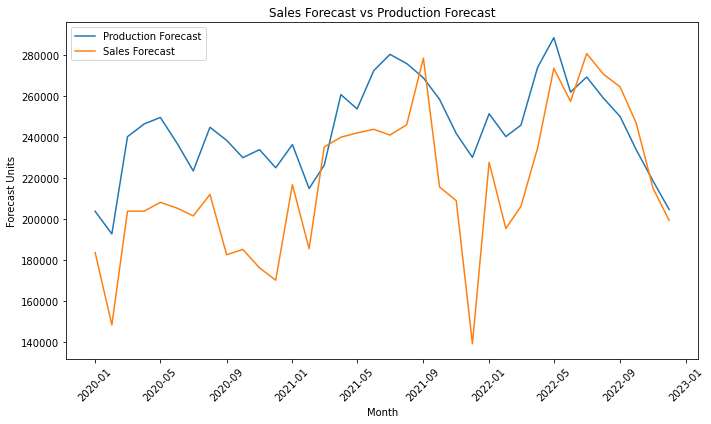

In [20]:
# Convert the index to datetime format
sum_df.index = pd.to_datetime(sum_df.index)

# Sort the DataFrame by the index (dates)
sum_df.sort_index(inplace=True)

# Set the figure size to be wider (adjust the width and height as needed)
plt.figure(figsize=(10, 6))
plt.plot(sum_df['Production Forecast'], label='Production Forecast')
plt.plot(sum_df['Sales Forecast'], label='Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Forecast Units')
plt.title('Sales Forecast vs Production Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Business Questions to solve:

2. Inefficiencies in forecast by comparing Actual Production to Production Forecast.


In [22]:
# Create new Production Forecast dataframe (dropping the Sales Forecast)

ProdFX_df = df_ProdSales_FX[df_ProdSales_FX['Forecast Type'] == 'Production Forecast'][['Date', 'Forecast Units']]

# Reset the index so that it starts from 0 again
ProdFX_df1 = ProdFX_df.reset_index(drop=True)
ProdFX_df1.head()

,Date,Forecast Units
0,1/1/2020,1532
1,2/1/2020,1908
2,3/1/2020,1800
3,4/1/2020,1092
4,5/1/2020,12


In [23]:
# Create new Actual Production dataframe (dropping the Machine & Shift columns)

df_Act_Prod2 = df_Act_Prod[['Date','Quantity']]
df_Act_Prod3 = df_Act_Prod2.copy()

In [24]:
# Convert the 'Date' column to datetime type

df_Act_Prod3['Date'] = pd.to_datetime(df_Act_Prod3['Date'])
ProdFX_df1['Date'] = pd.to_datetime(ProdFX_df1['Date'])

In [25]:
# Group the ProdFX_df1 data by month and sum the Forecast Units

ProdFX_df1_monthly = ProdFX_df1.groupby(ProdFX_df1['Date'].dt.to_period('M')).sum()
ProdFX_df1_monthly.head()

,Forecast Units
Date,
2020-01,203857
2020-02,192802
2020-03,240289
2020-04,246514
2020-05,249688


In [26]:
# Group the df_Act_Prod2 data by month and sum the Quantity

df_Act_Prod3_monthly = df_Act_Prod3.groupby(df_Act_Prod3['Date'].dt.to_period('M')).sum()
df_Act_Prod3_monthly.head()

,Quantity
Date,
2020-01,109464
2020-02,104643
2020-03,105909
2020-04,73939
2020-05,92433


In [27]:
# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(df_Act_Prod3_monthly, ProdFX_df1_monthly, on='Date', how='outer')

# Fill any missing values with 0
merged_df['Quantity'].fillna(0, inplace=True)
merged_df['Forecast Units'].fillna(0, inplace=True)

In [28]:
# Convert the 'Date' column back to datetime type for plotting
merged_df['Date'] = merged_df.index.to_timestamp()

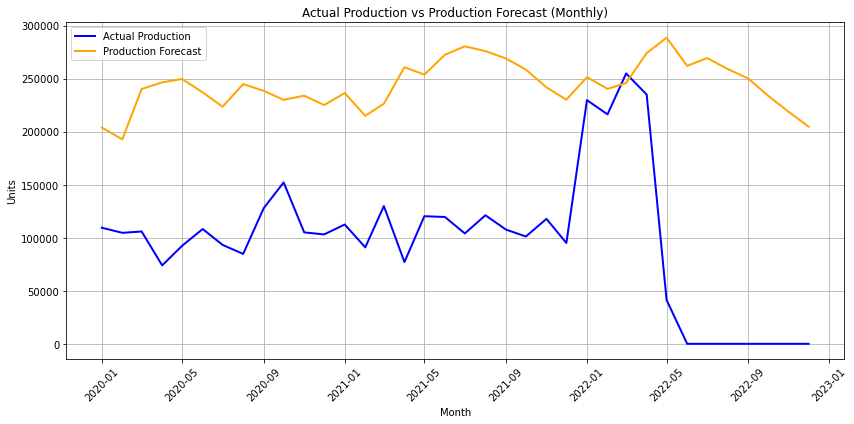

In [29]:
# Plot the time series graph
plt.figure(figsize=(12, 6))

# Plot Quantity as a line graph
plt.plot(merged_df['Date'], merged_df['Quantity'], label='Actual Production', color='blue', linewidth=2)

# Plot Forecast Units as a line graph
plt.plot(merged_df['Date'], merged_df['Forecast Units'], label='Production Forecast', color='orange', linewidth=2)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Units')
plt.title('Actual Production vs Production Forecast (Monthly)')

# Add gridlines for better readability
plt.grid(True)

# Add legend
plt.legend()

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the graph
plt.tight_layout()
plt.show()

### Business Questions to solve:

3. Accuracy of Forecast = [(Actual Production/Production Forecast) *100]


In [30]:
# Create a copy of the original DataFrame
ProdFX_df4 = ProdFX_df.copy()

# Replace zero values in 'Forecast Units' column with a small non-zero value in the new DataFrame
ProdFX_df4['Forecast Units'] = ProdFX_df4['Forecast Units'].replace(0, 0.0001)


In [31]:
Acc_FX = (df_Act_Prod2['Quantity']/ProdFX_df4['Forecast Units'])/100

# Calculate the overall accuracy by taking the average of forecast_accuracy
Overall_accuracy = Acc_FX.mean()

# Convert the overall_accuracy to a percentage
accuracy_percentage = round(Overall_accuracy, 2)

print("Accuracy of Forecast:", accuracy_percentage, "%")

Accuracy of Forecast: 47.68 %


### Business Questions to solve:

4. Identify products with high inaccuracies in forecasts based on historical data (2020 till date)


In [32]:
# Merge data frames (Actual Production with Product Type)

df_Act_Prod4 = df_Act_Prod.merge(df_Products, on='Product', how='left')
df_Act_Prod4.head()

,Date,Machine,Product,Quantity,Shift,Product Type
0,1/2/2020,F-12,Product 1,132,Shift#2,Cheddar & Sour
1,1/16/2020,F-12,Product 1,216,Shift#2,Cheddar & Sour
2,1/17/2020,F-12,Product 1,348,Shift#1,Cheddar & Sour
3,1/31/2020,F-12,Product 1,72,Shift#2,Cheddar & Sour
4,2/2/2020,F-12,Product 1,324,Shift#2,Cheddar & Sour


In [33]:
# Merge data frames (Production Forecast with Product Type)

df_ProdSales_FX2 = df_ProdSales_FX.merge(df_Products, on='Product', how='left')
df_ProdSales_FX2.head()

,Date,Product,Forecast Type,Forecast Units,Product Type
0,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour
1,1/1/2020,Product 1,Sales Forecast,1532,Cheddar & Sour
2,2/1/2020,Product 1,Production Forecast,1908,Cheddar & Sour
3,2/1/2020,Product 1,Sales Forecast,1908,Cheddar & Sour
4,3/1/2020,Product 1,Production Forecast,1800,Cheddar & Sour


In [34]:
# Drop rows with 'Sales Forecast' in the 'Forecast Type' column
df_ProdSales_FX2 = df_ProdSales_FX2.drop(df_ProdSales_FX2[df_ProdSales_FX2['Forecast Type'] == 'Sales Forecast'].index)
df_ProdSales_FX2.head()

,Date,Product,Forecast Type,Forecast Units,Product Type
0,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour
2,2/1/2020,Product 1,Production Forecast,1908,Cheddar & Sour
4,3/1/2020,Product 1,Production Forecast,1800,Cheddar & Sour
6,4/1/2020,Product 1,Production Forecast,1092,Cheddar & Sour
8,5/1/2020,Product 1,Production Forecast,12,Cheddar & Sour


In [35]:
# Merge the two dataframes

df_5 = pd.merge(df_ProdSales_FX2, df_Act_Prod4, on='Product')
df_5.head()

,Date_x,Product,Forecast Type,Forecast Units,Product Type_x,Date_y,Machine,Quantity,Shift,Product Type_y
0,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour,1/2/2020,F-12,132,Shift#2,Cheddar & Sour
1,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour,1/16/2020,F-12,216,Shift#2,Cheddar & Sour
2,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour,1/17/2020,F-12,348,Shift#1,Cheddar & Sour
3,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour,1/31/2020,F-12,72,Shift#2,Cheddar & Sour
4,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour,2/2/2020,F-12,324,Shift#2,Cheddar & Sour


In [36]:
# Create the new column 'Percentage'

df_5['Percentage'] = (df_5['Quantity'] / df_5['Forecast Units']) * 100
df_5.head()

,Date_x,Product,Forecast Type,Forecast Units,Product Type_x,Date_y,Machine,Quantity,Shift,Product Type_y,Percentage
0,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour,1/2/2020,F-12,132,Shift#2,Cheddar & Sour,8.616188
1,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour,1/16/2020,F-12,216,Shift#2,Cheddar & Sour,14.099217
2,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour,1/17/2020,F-12,348,Shift#1,Cheddar & Sour,22.715405
3,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour,1/31/2020,F-12,72,Shift#2,Cheddar & Sour,4.699739
4,1/1/2020,Product 1,Production Forecast,1532,Cheddar & Sour,2/2/2020,F-12,324,Shift#2,Cheddar & Sour,21.148825


In [37]:
# Group by 'Product' and calculate the mean percentage for each group
grouped_df = df_5.groupby('Product')['Percentage'].mean()

# Sort the groups based on the mean percentage and select the top 10 lowest groups
top_5_lowest = grouped_df.nsmallest(5)


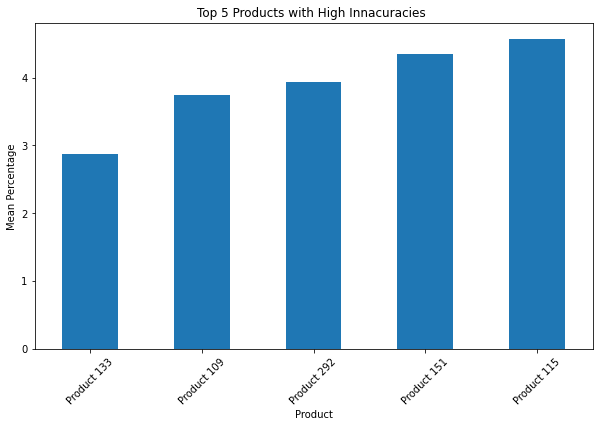

In [38]:
# Plot the top 5 Products with high innacuracies 
plt.figure(figsize=(10, 6))
top_5_lowest.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Mean Percentage')
plt.title('Top 5 Products with High Innacuracies ')
plt.xticks(rotation=45)
plt.show()


### Business Questions to solve:

5.	How many shortages of orders (compare Sales Orders vs Finished Goods Inventory?)

In [39]:
# Get the Inventory Closing per Product

df_Prod_Inv = df_Fin_Inv.merge(df_Products, on='Product', how='left')
df_Prod_Inv.drop(df_Prod_Inv.iloc[:, 2:5], axis=1, inplace=True)
df_Prod_Inv.head()

,Date,Product,Closing,Product Type
0,5/24/2022,Product 1,129,Cheddar & Sour
1,5/24/2022,Product 2,877,Cheddar & Sour
2,5/24/2022,Product 3,1593,Cheddar & Sour
3,5/24/2022,Product 4,463,Cheddar & Sour
4,5/24/2022,Product 5,2284,Cheddar & Sour


In [40]:
# Get the total Sales Order per Product

df_Prod_SO3 = df_SO2.merge(df_Products, on='Product', how='left')
df_Prod_SO3.drop(df_Prod_SO3.iloc[:, 1:15], axis=1, inplace=True)
df_Prod_SO3.head()

,Product,SO SUM,Product Type
0,Product 1,36,Cheddar & Sour
1,Product 2,792,Cheddar & Sour
2,Product 3,525,Cheddar & Sour
3,Product 4,0,Cheddar & Sour
4,Product 5,5364,Cheddar & Sour


In [41]:
# Merge dataframes on 'Product' column
df_merged = df_Prod_SO3.merge(df_Prod_Inv, on='Product', how='left')

# Calculate the shortage of orders
df_merged['Shortage'] = df_merged['SO SUM'] - df_merged['Closing']


In [42]:
# Fill non-finite values with 0 in 'Closing' column
df_merged['Closing'].fillna(0, inplace=True)
df_merged['Shortage'].fillna(0, inplace=True)

# Convert 'Closing' and 'Shortage' columns to integer
df_merged['Closing'] = df_merged['Closing'].astype(int)
df_merged['Shortage'] = df_merged['Shortage'].astype(int)

# Display the result
print(df_merged[['Product', 'SO SUM', 'Closing', 'Shortage']])

         Product  SO SUM  Closing  Shortage
0      Product 1      36      129       -93
1      Product 2     792      877       -85
2      Product 3     525     1593     -1068
3      Product 4       0      463      -463
4      Product 5    5364     2284      3080
..           ...     ...      ...       ...
176  Product 203       0     1916     -1916
177  Product 204       0     1184     -1184
178  Product 205       0      793      -793
179  Product 206       0       18       -18
180  Product 208       0        1        -1

[181 rows x 4 columns]


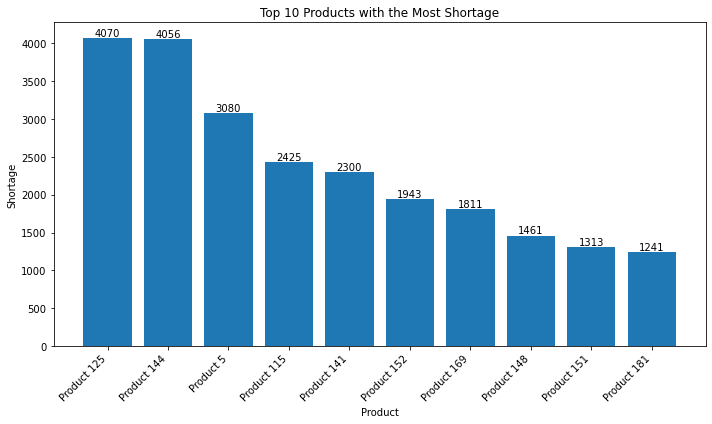

In [43]:
# Sort the dataframe by 'Shortage' column in descending order
df_sorted = df_merged.sort_values(by='Shortage', ascending=False)

# Select the top 10 products with the most shortage
top_10_products = df_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['Product'], top_10_products['Shortage'])
plt.xlabel('Product')
plt.ylabel('Shortage')
plt.title('Top 10 Products with the Most Shortage')
plt.xticks(rotation=45, ha='right')

# Add shortage values as text annotations above each bar
for index, value in enumerate(top_10_products['Shortage']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Business Questions to solve:
6.	Calculate Sell-through rate: Sell-through rate = (Units Consumed/Units Produced)

In [44]:
Sell_through_rate = (df_Fin_Inv["Consumed"].sum()/ df_Fin_Inv["Produced"].sum())

print(f'{round(Sell_through_rate, 2)}%')


-1.13%


Text(0.5, 1.0, 'Inventory Analysis')

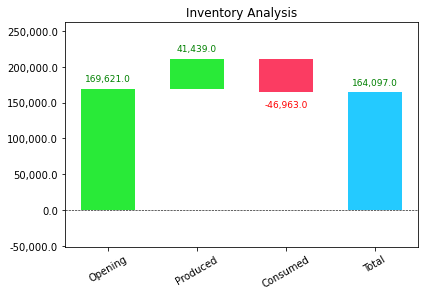

In [45]:
a = ['Opening','Produced','Consumed']
b = [169621,41439,-46963]
waterfall_chart.plot(a, b, net_label='Total');
plt.title('Inventory Analysis')

### Business Questions to solve:

7. Identify items in Finished Goods Inventory for which we have no or low sales (consumed means sold).

In [46]:
# Join the dataframe (Product + Sales Order)

df_Prod_SO = pd.merge(df_SO, df_Products, on='Product')

In [47]:
# Check Items with no or low Sales

Stat_Prod_SO = df_Prod_SO.groupby('Product Type')['Quantity'].describe()
Stat_Prod_SO

,count,mean,std,min,25%,50%,75%,max
Product Type,,,,,,,,
BBQ,7.0,168.428571,270.421805,0.0,15.00,27.0,186.00,750.0
Cheddar & Sour,18.0,780.722222,738.144558,0.0,174.00,497.5,1353.50,2284.0
Cheddar Cheese,20.0,1073.900000,1138.011003,79.0,416.75,672.0,932.25,3735.0
Cheese & jalapeno,2.0,6.000000,4.242641,3.0,4.50,6.0,7.50,9.0
Chicken & Waffles,28.0,753.285714,817.873750,0.0,173.50,504.0,953.75,3009.0
Chilli Cheese,5.0,42.800000,42.055915,2.0,2.00,44.0,67.00,99.0
Lightly Salted,7.0,262.714286,529.779424,1.0,8.50,28.0,171.00,1451.0
Original,35.0,1746.285714,2062.053767,0.0,423.50,960.0,1891.50,8196.0
Salt & Vinegar,40.0,909.550000,765.208869,14.0,347.00,640.5,1289.75,2989.0


In [48]:
# Group the data and calculate the sum of Quantity for each Product Type
df_grouped = df_Prod_SO.groupby('Product Type')['Quantity'].sum().reset_index()

# Sort the df_grouped DataFrame based on Quantity in descending order
df_grouped = df_grouped.sort_values(by='Quantity', ascending=False)

# Create a new DataFrame for plotting
df_plot = pd.DataFrame({'Product Type': df_grouped['Product Type'], 'Quantity': df_grouped['Quantity']})


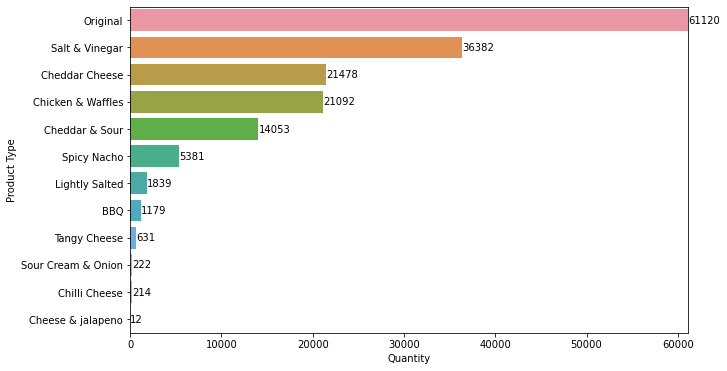

In [49]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using seaborn
sns.barplot(x='Quantity', y='Product Type', data=df_plot)

# Annotate each bar with its value (as integer)
for index, value in enumerate(df_grouped['Quantity']):
    # Adjust the x-coordinate and text alignment for the annotations
    plt.text(value + 5, index, f'{int(value)}', ha='left', va='center')

# Set the x-axis limit to make space for annotations
plt.xlim(right=df_grouped['Quantity'].max() + 10)

# Show the plot
plt.show()


### Business Questions to solve:

8.	Fill rate = [(*Total Units in inventory-Consumed Units)/Total Units in inventory] *100

*Total Units in inventory = Opening + Produced


In [50]:
Fill_rate = (((df_Fin_Inv["Opening"].sum() + df_Fin_Inv["Produced"].sum())- df_Fin_Inv["Consumed"].sum())
             /(df_Fin_Inv["Opening"].sum() + df_Fin_Inv["Produced"].sum()))

print(f'{round(Fill_rate, 2)}%')


1.22%


### Business Questions to solve:

9. Predict the remaining 2022 forecast using Actual Production vs Production Forecast.


### Business Questions to solve:

10. Predict the 2022 sales team performance using Sales Forecast vs Production Forecast.